In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.rcParams['figure.figsize'] = [11, 11]

# Plotting Geophysical Data in Python using Basemap

This post explores different ways to plot geophysical data on maps using Python.

In this notebook I am going to focus on ways to produce static images rather than interactive html apps.

Packages for plotting:
- Static Maps: Basemap
- Interactive html maps: gmap

## Installing the `Basemap` package

`Basemap` is a very flexible package for plotting data on maps - but it can get relatively complicated quite fast.

The starting point for these examples was the [Python Graph Gallery](https://python-graph-gallery.com/map/)

Lots of examples are given in the [Basemap Tutorials Manual](https://media.readthedocs.org/pdf/basemaptutorial/latest/basemaptutorial.pdf)

Basemap is not installed by default in conda and it can be tricky getting it installed correctly!

- You can install basemap using `conda install -c conda-forge basemap`
- To install the high resolution basemaps using conda `conda install -c conda-forge basemap-data-hires`.

At the time of writing there is an error thrown about `PROJ4` environmental variable the when you try to import the basemap package. The code below fixes that - I expect this code will not be required in the near future!

In [2]:
#Hack to fix missing PROJ4 env var when importing Basemap
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

# Projections and colourschemes using basemap

In [3]:
# Always start with the basemap function to initialize a map
m=Basemap()
 
# Then add element: draw coast line, map boundary, and fill continents:
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents()
 
# You can add rivers as well
m.drawrivers(color='#0000ff')
 
plt.show()

In [17]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [6]:
# Initialize the map
map = Basemap(llcrnrlon=-160, llcrnrlat=-60,urcrnrlon=160,urcrnrlat=70)
 
# Continent and countries!
map.drawmapboundary(fill_color='#A6CAE0')
map.fillcontinents(color='#e6b800',lake_color='#e6b800')
map.drawcountries(color="white")
plt.show()

In [7]:
# initialise
map = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,resolution='i', lat_0 = 40., lon_0 = -80)
 
# map states
map.drawmapboundary(fill_color='#A6CAE0')
map.fillcontinents(color='#e6b800',lake_color='#A6CAE0')
map.drawstates()
map.drawcountries()
plt.show()

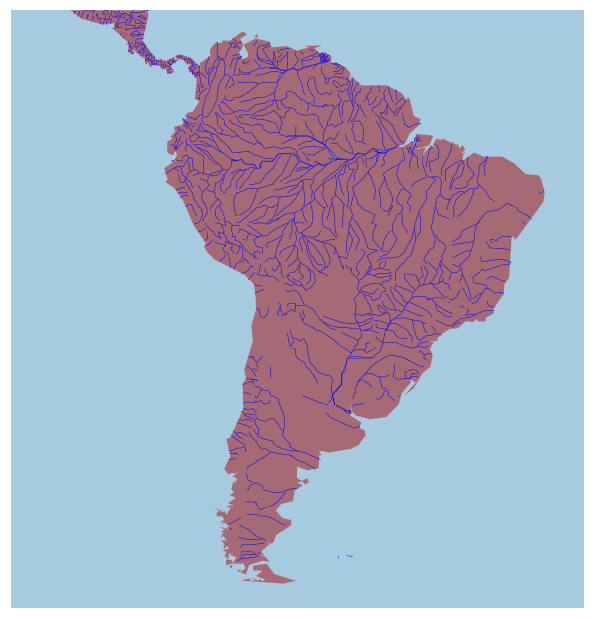

In [8]:
# Control the position of the square. Give the coordinate of 2 corners
m=Basemap(llcrnrlon=-100, llcrnrlat=-58,urcrnrlon=-30,urcrnrlat=15)
 
# Draw the components of the map
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='brown', alpha=0.6, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

m.drawrivers(color='#0000ff')
plt.show()

# Using different backgrounds in Basemap

In [12]:
m = Basemap(llcrnrlon=-10.5,llcrnrlat=33,urcrnrlon=10.,urcrnrlat=46., resolution='i', projection='cass', lat_0 = 39.5, lon_0 = 0.)
m.bluemarble()
plt.show()

In [13]:
m = Basemap(llcrnrlon=-10.5,llcrnrlat=33,urcrnrlon=10.,urcrnrlat=46., resolution='i', projection='cass', lat_0 = 39.5, lon_0 = 0.)
m.shadedrelief()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


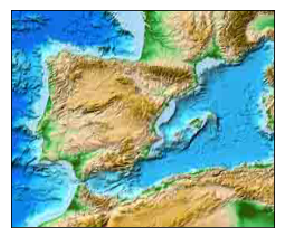

In [14]:
m = Basemap(llcrnrlon=-10.5,llcrnrlat=33,urcrnrlon=10.,urcrnrlat=46., resolution='i', projection='cass', lat_0 = 39.5, lon_0 = 0.)
m.etopo()


http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-10.5,33.0,10.0,46.0&bboxSR=4326&imageSR=4326&size=1500,951&dpi=96&format=png32&transparent=true&f=image


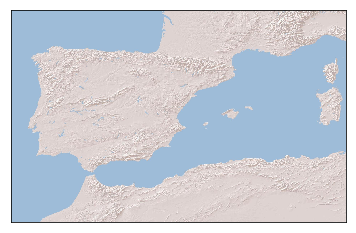

In [15]:
m = Basemap(projection='mill',llcrnrlon=-10.5,llcrnrlat=33,urcrnrlon=10.,urcrnrlat=46., resolution = 'l', epsg = 4326)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)

In [16]:
m = Basemap(projection='mill',llcrnrlon=-10.5,llcrnrlat=33,urcrnrlon=10.,urcrnrlat=46., resolution = 'l', epsg = 4326)
m.arcgisimage(service='Ocean_Basemap', xpixels = 1500, verbose= True)

http://server.arcgisonline.com/ArcGIS/rest/services/Ocean_Basemap/MapServer/export?bbox=-10.5,33.0,10.0,46.0&bboxSR=4326&imageSR=4326&size=1500,951&dpi=96&format=png32&transparent=true&f=image


---

# Adding Data

## Plotting the Southern California Earthquake Catalogue

In [5]:
url = "http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/2010.catalog"
df = pd.read_csv(url , delim_whitespace=True, skiprows=9, skipfooter=1, parse_dates={'datetime':[0,1]}, index_col=0 )

print(df.tail())
print("The shape of df is: ", df.shape)

/Users/mnaylor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


                         ET GT   MAG  M     LAT      LON  DEPTH  Q      EVID  \
datetime                                                                       
2010-12-31 23:12:13.190  eq  l  1.53  l  35.812 -118.492   10.5  A  10865245   
2010-12-31 23:16:32.640  eq  l  0.36  l  33.491 -116.570    7.0  A  10865253   
2010-12-31 23:21:58.960  eq  l  2.13  l  32.209 -115.374    3.5  B  10865269   
2010-12-31 23:24:03.700  eq  l  1.05  l  33.283 -116.432    3.5  A  10865261   
2010-12-31 23:25:56.700  eq  l  0.56  l  33.494 -116.554   10.8  A  10865277   

                         NPH  NGRM  
datetime                            
2010-12-31 23:12:13.190   20     0  
2010-12-31 23:16:32.640   20     0  
2010-12-31 23:21:58.960   17     0  
2010-12-31 23:24:03.700   20     0  
2010-12-31 23:25:56.700   26     0  
The shape of df is:  (41959, 11)


Let's make a quick plot of the time series of magnitudes in this catalogue.

- Note that we get sensible labelling of the datetimes because we are using the datetime object as the index of the dataframe

Text(0,0.5,'Magnitude')

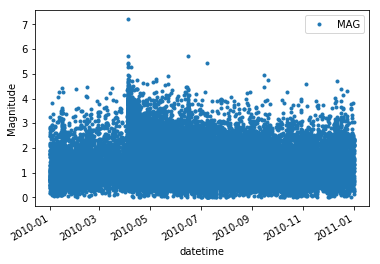

In [6]:
df.plot(y='MAG', style='.')
plt.ylabel('Magnitude')

We can do a quick scatter plot to see the locations:

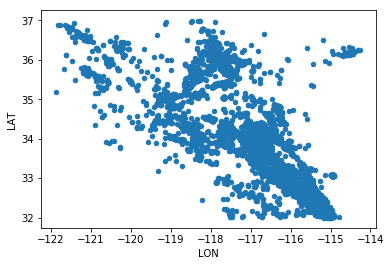

In [7]:
df.plot(kind="scatter", y="LAT", x="LON")

That was not a very pretty scatterplot. Let's try layering different information.

Lets now plot this using basemap coloured by depth and with the size proportional to the magnitude of the event.
- Setting `zorder=3` ensures that the points are plotted after the state patches

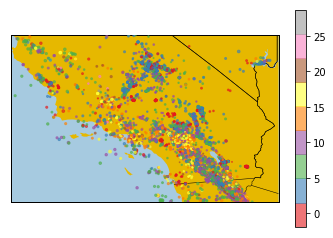

In [8]:
map = Basemap(llcrnrlon=-122,llcrnrlat=32,urcrnrlon=-114,urcrnrlat=37.,resolution='i', lat_0 = 40., lon_0 = -80)
 
# map states
map.drawmapboundary(fill_color='#A6CAE0')
map.fillcontinents(color='#e6b800',lake_color='#A6CAE0')
map.drawstates()

map.drawcountries()

map.scatter(df['LON'], df['LAT'], s=df['MAG']*2, alpha=0.6, c=df['DEPTH'], cmap="Set1", zorder=3)
plt.colorbar()

plt.show()

And on a shaded relief map

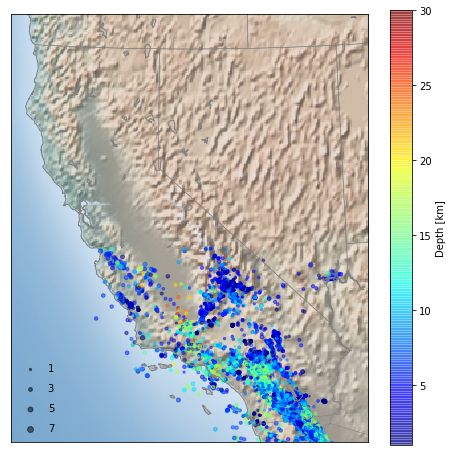

In [9]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter eartqhuake events, with color depth
# and size proporational to magnitude
m.scatter(df['LON'].values, df['LAT'].values, latlon=True,
          c=df['DEPTH'].values, s=5*df['MAG'].values,
          cmap='jet', alpha=0.5)

# 3. create colorbar
plt.colorbar(label=r'Depth [km]')
plt.clim(1, 30)

# 4. make legend with dummy points
for a in [1, 3, 5, 7]:
    plt.scatter([], [], c='k', alpha=0.5, s=5*a, label=str(a))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

Colour by time

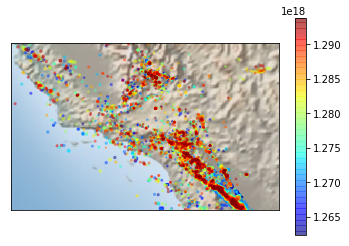

In [10]:
m = Basemap(llcrnrlon=-122,llcrnrlat=32,urcrnrlon=-114,urcrnrlat=37., resolution='h')
m.shadedrelief()

# Add a point per position
m.scatter(df['LON'], df['LAT'], s=df['MAG']*2, alpha=0.4, c=df.index, cmap="jet")
plt.colorbar()

plt.show()

## Connect two points with a great circle

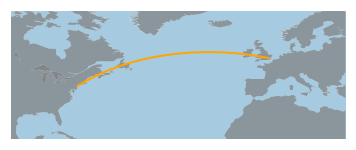

In [11]:
# A basic map
m=Basemap(llcrnrlon=-100, llcrnrlat=20,urcrnrlon=30,urcrnrlat=70)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='orange')

# Changing Projections in Basemap

In [58]:
## Function to automate drawing of parallels and meridians

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

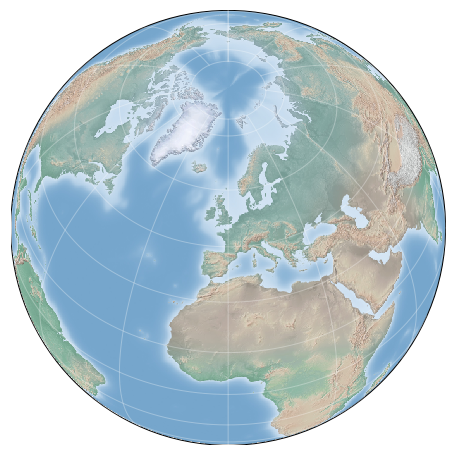

In [59]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m)

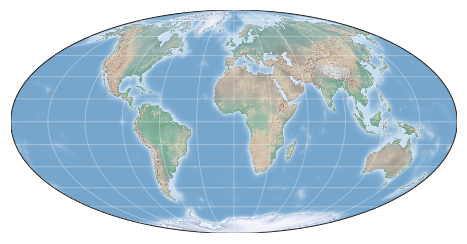

In [60]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

# High vs Low resolution coastlines


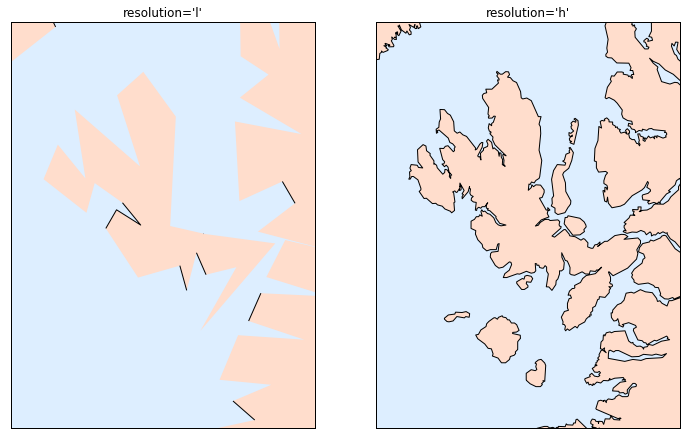

In [62]:
# Modified from: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));